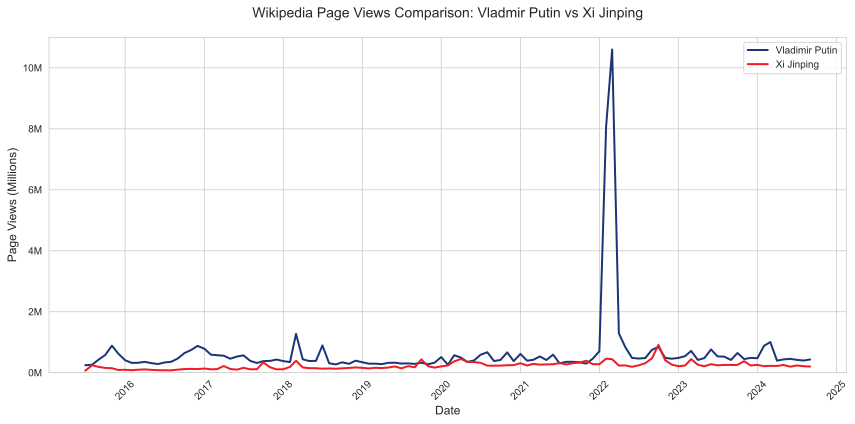

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

# Read the CSV files
putin_df = pd.read_csv('Putin_page_views.csv')
xi_df = pd.read_csv('Xi_Jinping_page_views.csv')

# Convert Date columns to Datetime if needed
putin_df['Date'] = pd.to_datetime(putin_df['Date'])
xi_df['Date'] = pd.to_datetime(xi_df['Date'])

# Create the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot both lines with correct column names
plt.plot(putin_df['Date'], putin_df['Vladimir Putin'], label='Vladimir Putin', color='#1C3578', linewidth=2)
plt.plot(xi_df['Date'], xi_df['Xi Jinping'], label='Xi Jinping', color='#EE1C25', linewidth=2)

# Customize the plot
plt.title('Wikipedia Page Views Comparison: Vladmir Putin vs Xi Jinping', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Page Views (Millions)', fontsize=12)
plt.ylim(0, 11_000_000)  # Set y-axis range from 0 to 11M
plt.gca().yaxis.set_major_formatter(lambda x, p: f'{int(x/1e6)}M')  # Format y-axis labels as millions
plt.legend(fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot as SVG
plt.savefig('pageviews_comparison.svg')

# Show the plot
plt.show()

In [56]:
# Read the data
putin_df = pd.read_csv('Putin_page_views.csv')
xi_df = pd.read_csv('Xi_Jinping_page_views.csv')

putin_df['Date'] = pd.to_datetime(putin_df['Date'])
xi_df['Date'] = pd.to_datetime(xi_df['Date'])

# Create Putin's plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(putin_df['Date'], putin_df['Vladimir Putin'], color='#1C3578', linewidth=2)
plt.title('Wikipedia Page Views: Vladimir Putin', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Page Views (Millions)', fontsize=12)
plt.ylim(0, 11_000_000)
plt.gca().yaxis.set_major_formatter(lambda x, p: f'{int(x/1e6)}M')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('putin_pageviews.svg', format='svg', bbox_inches='tight', dpi=300)
plt.close()
plt.show()

# Create Xi's plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(xi_df['Date'], xi_df['Xi Jinping'], color='#EE1C25', linewidth=2)
plt.title('Wikipedia Page Views: Xi Jinping', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Page Views (Millions)', fontsize=12)
plt.ylim(0, 2_000_000)
plt.gca().yaxis.set_major_formatter(lambda x, p: f'{int(x/1e6)}M')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('xi_pageviews.svg', format='svg', bbox_inches='tight', dpi=300)
plt.close()
plt.show()

In [57]:
# Import the file

import pyarrow.feather as feather

# Specify the file path
file_path = "/Users/avnee/Desktop/Oxford/Michaelmas/Fundamentals of SDS in Python/week02/wikiarticles_seg_data.feather"

# Read the .feather file
wiki_articles_df = feather.read_feather(file_path)

# Print the information about the dataframe
print(wiki_articles_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 286770 entries, 0 to 311515
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         286770 non-null  object
 1   text          286770 non-null  object
 2   file_id       286770 non-null  object
 3   month         286770 non-null  object
 4   year          286770 non-null  object
 5   article_name  286770 non-null  object
 6   category      286770 non-null  object
dtypes: object(7)
memory usage: 17.5+ MB
None


In [60]:
# Read the feather file
df = pd.read_feather('wikiarticles_seg_data.feather')

# Function to count occurrences of 'authoritarian' in text
def count_authoritarian(text):
    return text.lower().count('authoritarian')

# Create a new column with the count of 'authoritarian' for each row
df['authoritarian_count'] = df['text'].apply(count_authoritarian)

# Group by year and article_name, sum the counts
yearly_counts = df.groupby(['year', 'article_name'])['authoritarian_count'].sum().reset_index()

# Pivot the data for plotting
pivot_data = yearly_counts.pivot(index='year', columns='article_name', values='authoritarian_count')

# Create the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plt.plot(pivot_data.index, pivot_data['Vladimir Putin'], marker='o', label='Vladimir Putin', color='#1f77b4', linewidth=2)
plt.plot(pivot_data.index, pivot_data['Xi Jinping'], marker='o', label='Xi Jinping', color='#ff7f0e', linewidth=2)

plt.title('Occurrences of "Authoritarian" Over Time', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('authoritarian_yearly_trend.svg', format='svg', bbox_inches='tight', dpi=300)
plt.close()

# Print the yearly counts
print("\nYearly occurrences of 'authoritarian':")
print(pivot_data.to_string())


Yearly occurrences of 'authoritarian':
article_name  Vladimir Putin  Xi Jinping
year                                    
2004                     0.0         NaN
2005                     0.0         0.0
2006                     0.0         0.0
2007                  2194.0         0.0
2008                     0.0         0.0
2009                     1.0         0.0
2010                     0.0         0.0
2011                     0.0         0.0
2012                   329.0         0.0
2013                   529.0         0.0
2014                   643.0       116.0
2015                   458.0       333.0
2016                  1590.0       262.0
2017                   628.0       442.0
2018                   614.0       784.0
2019                   286.0       543.0
2020                   574.0        98.0
2021                   455.0       334.0
2022                  1726.0      1200.0
2023                   755.0      1093.0
2024                   600.0       775.0
